In [259]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:

cars = pd.read_csv(r'D:\DataAnalystProject\carPricePrediction.csv')
cars.head()

cars.shape

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [261]:
#splitting company name from carname column

CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,'CompanyName',CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

cars.CompanyName.unique()

cars.CompanyName = cars.CompanyName.str.lower()
cars.CompanyName.unique()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [262]:

#derive newfield -Fuel economy

cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars.head()

#binning the car companies based on avg price of each company

cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(),how = 'left',on = 'CompanyName')
bins = [0,10000,20000,40000]
car_bin = ['Budget','Medium', 'Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
cars.head(20)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,21.70,Medium
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,21.70,Medium
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,21.70,Medium
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,18.35,Medium
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859,18.70,Medium


In [263]:
#check the correlations values of final list variables
numeric_cols = cars.select_dtypes(include = [np.number])
cor = numeric_cols.corr()
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [264]:
# find out fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i,j]),'--',i,'--',j,'--',colname1,'--',colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

print(cor.columns)
print('------')
print(correlated_features)

cor['highwaympg']['citympg']

correlated_features = list(correlated_features)
corh = cars[correlated_features].corr()
corh

0.874587475964264 -- 3 -- 2 -- carlength -- wheelbase
0.8411182684818453 -- 4 -- 3 -- carwidth -- carlength
0.8777284608306433 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 6 -- 4 -- curbweight -- carwidth
0.850594073426277 -- 7 -- 6 -- enginesize -- curbweight
0.8097686545377302 -- 11 -- 7 -- horsepower -- enginesize
0.8014561756662708 -- 13 -- 11 -- citympg -- horsepower
0.9713370423425045 -- 14 -- 13 -- highwaympg -- citympg
0.835305437204371 -- 15 -- 6 -- price -- curbweight
0.8741451426986426 -- 15 -- 7 -- price -- enginesize
0.8081381197889799 -- 15 -- 11 -- price -- horsepower
0.9938444201653043 -- 16 -- 13 -- fueleconomy -- citympg
0.9916921560568324 -- 16 -- 14 -- fueleconomy -- highwaympg
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
------
{'

,carlength,curbweight,highwaympg,price,citympg,enginesize,fueleconomy,carwidth,horsepower,wheelbase
carlength,1.000000,0.877728,-0.704662,0.682921,-0.670909,0.683360,-0.691472,0.841118,0.552623,0.874587
curbweight,0.877728,1.000000,-0.797465,0.835305,-0.757414,0.850594,-0.781535,0.867032,0.750739,0.776386
highwaympg,-0.704662,-0.797465,1.000000,-0.697600,0.971337,-0.677470,0.991692,-0.677218,-0.770544,-0.544082
price,0.682921,0.835305,-0.697600,1.000000,-0.685752,0.874145,-0.696214,0.759325,0.808138,0.577816
citympg,-0.670909,-0.757414,0.971337,-0.685752,1.000000,-0.653658,0.993844,-0.642704,-0.801456,-0.470414
enginesize,0.683360,0.850594,-0.677470,0.874145,-0.653658,1.000000,-0.669464,0.735433,0.809769,0.569329
fueleconomy,-0.691472,-0.781535,0.991692,-0.696214,0.993844,-0.669464,1.000000,-0.663419,-0.792822,-0.508136
carwidth,0.841118,0.867032,-0.677218,0.759325,-0.642704,0.735433,-0.663419,1.000000,0.640732,0.795144
horsepower,0.552623,0.750739,-0.770544,0.808138,-0.801456,0.809769,-0.792822,0.640732,1.000000,0.353294
wheelbase,0.874587,0.776386,-0.544082,0.577816,-0.470414,0.569329,-0.508136,0.795144,0.353294,1.000000


<Axes: >

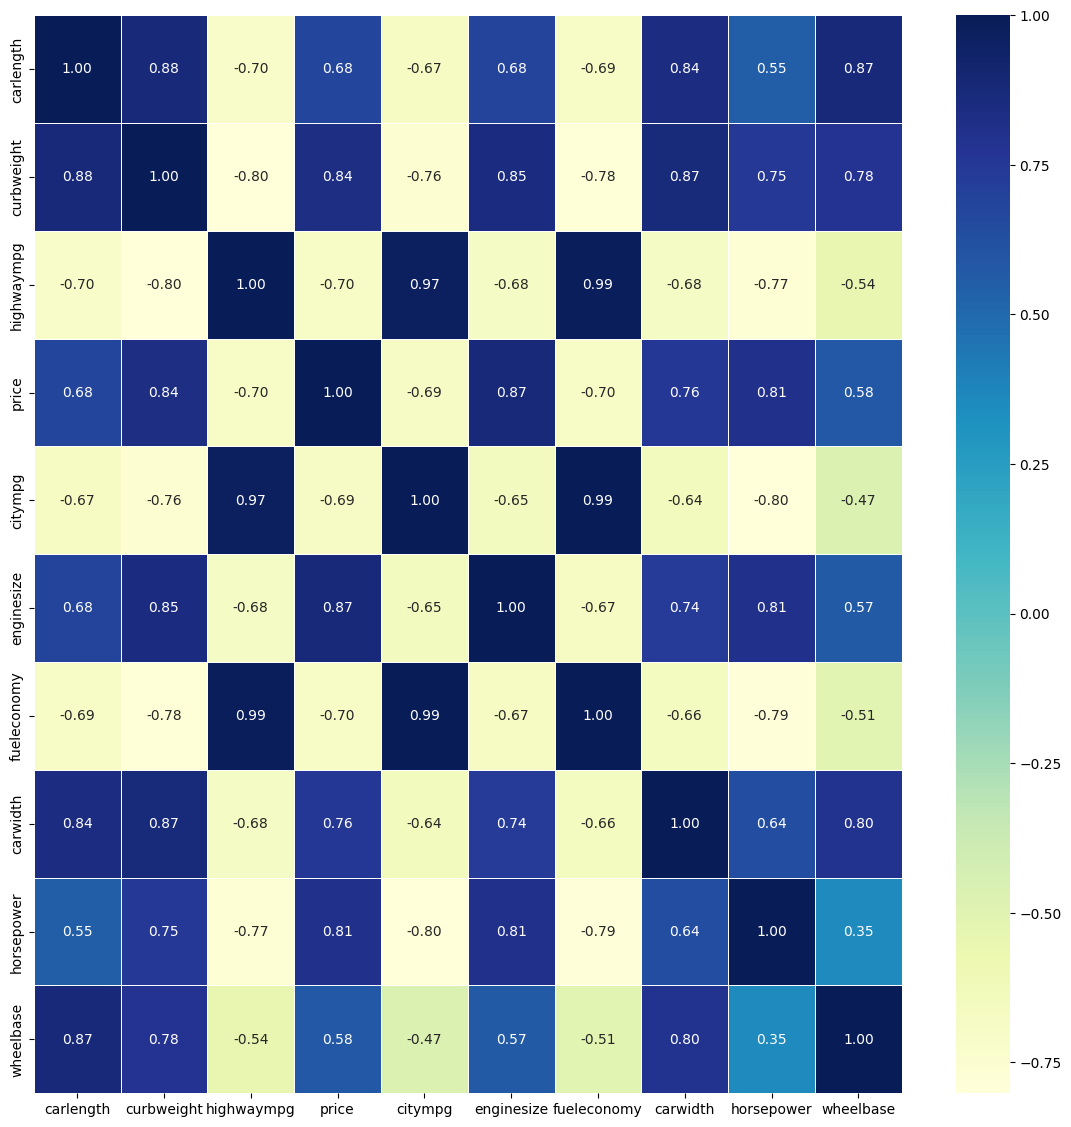

In [265]:
#produce Heatmap
plt.figure(figsize = (14,14))
sns.heatmap(corh,annot = True,linewidth = .5,fmt=".2f",cmap="YlGnBu")

In [266]:
#Feature Engineering Create Dummy variables for Ordinal variables

print(cars['fueltype'].unique())
print(cars['aspiration'].unique())
print(cars['carbody'].unique())
print(cars['drivewheel'].unique())
print(cars['enginetype'].unique())
print(cars['cylindernumber'].unique())
print(cars['fuelsystem'].unique())
print(cars['CompanyName'].unique())
print(cars['doornumber'].unique())
print(cars['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [267]:


# defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first = True)
    df = pd.concat([df,temp],axis = 1)
    df.drop([x],axis = 1,inplace =True)
    return df

cars_lr = cars
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('CompanyName',cars_lr)
cars_lr = dummies('doornumber',cars_lr)
cars_lr = dummies('enginelocation',cars_lr)
cars_lr = dummies('fuelsystem',cars_lr)

cars_lr.info()

cars_lr.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int32  
 16  fueleconomy       205 non-null    float64
 1

(205, 69)

In [268]:
#train-test split

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(cars_lr,train_size = 0.7,test_size=0.3,random_state=100)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase','carheight','stroke','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','gas',
           'turbo','hardtop','hatchback','sedan','wagon','fwd','rwd','dohcv','l','ohc','ohcf','ohcv','rotor','five','four','six','three','twelve','two','Medium','Highend','audi','bmw','buick','chevrolet','dodge',
           'honda','isuzu','jaguar','mazda','mercury','mitsubishi','nissan','peugeot','plymouth','porsche','renault','saab','subaru','toyota','volkswagen','volvo','two','rear','2bbl','4bbl','idi','mfi','mpfi','spdi','spfi']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

X_train = X_train.astype(int)
y_train = y_train.astype(int)
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,63.8,0.265487,0.272692,0.139623,0.230159,0.525253,9.4,0.083333,5500,31,38,7609,0.530864,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,126,3,0.272414,0.452033,68.3,0.212389,0.500388,0.339623,1.000000,0.464646,9.5,0.395833,5500,19,27,22018,0.213992,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,167,1,0.272414,0.448780,64.0,0.424779,0.314973,0.139623,0.444444,0.449495,9.4,0.266667,6600,26,29,9538,0.344307,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,0.068966,0.450407,64.1,0.088496,0.411171,0.260377,0.626984,0.247475,9.0,0.262500,5000,21,27,16500,0.244170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,200,-1,0.610345,0.775610,67.2,0.858407,0.647401,0.260377,0.746032,0.484848,7.5,0.475000,5100,17,22,18950,0.122085,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [269]:
#dividing data into x and y variables

y_train = df_train.pop('price')
X_train = df_train

In [270]:
#Model Building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return(vif)

model1 = build_model(X_train, y_train)

X_train.columns

X_train1 = X_train.drop(['car_ID', 'wheelbase', 'carlength', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'hardtop',
 'sedan','wagon','fwd','rwd','dohcv','l','ohc','ohcf','ohcv','six','Medium',
'audi','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','nissan','porsche','renault','saab',
 'subaru','toyota','volkswagen','volvo','two','2bbl','4bbl','idi','mfi','mpfi','spdi'], axis=1)

model2 = build_model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           3.34e-49
Time:                        22:45:35   Log-Likelihood:                -1219.0
No. Observations:                 143   AIC:                             2556.
Df Residuals:                      84   BIC:                             2731.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.65e+04   1.06e+04  

In [271]:
#Feature Elimination using RFE

lm = LinearRegression()
lm.fit(X_train1,y_train)

rfe = RFE(estimator=lm,n_features_to_select=10)
rfe = rfe.fit(X_train1,y_train)

X_train1.columns[rfe.support_]

rfe.support_

X_train1.columns

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'fueleconomy', 'gas', 'turbo',
       'hatchback', 'rotor', 'five', 'four', 'three', 'twelve', 'Highend',
       'bmw', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'rear', 'spfi'],
      dtype='object')

In [272]:
#building model using statsmodel for the detailed statistics

X_train_rfe = X_train[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,boreratio,stroke,rotor,three,twelve,Highend,bmw,rear
122,0.272692,0.139623,0.230159,0.525253,0.0,0.0,0.0,0.0,0.0,0.0
125,0.500388,0.339623,1.000000,0.464646,0.0,0.0,0.0,1.0,0.0,0.0
166,0.314973,0.139623,0.444444,0.449495,0.0,0.0,0.0,0.0,0.0,0.0
1,0.411171,0.260377,0.626984,0.247475,0.0,0.0,0.0,0.0,0.0,0.0
199,0.647401,0.260377,0.746032,0.484848,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
#create model using rfe returned Features

model4 = build_model(X_train_rfe,y_train)

X_train_new = X_train_rfe.drop(['twelve'],axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.28e-64
Time:                        22:45:35   Log-Likelihood:                -1310.2
No. Observations:                 143   AIC:                             2642.
Df Residuals:                     132   BIC:                             2675.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3573.0145   1034.888      3.453      0.0

In [274]:
#recreate Model

model5 = build_model(X_train_new,y_train)

X_train_new = sm.add_constant(X_train_new)
y_train_pred = model5.predict(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           4.09e-65
Time:                        22:45:35   Log-Likelihood:                -1311.7
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     133   BIC:                             2673.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3094.4753   1002.074      3.088      0.0

In [275]:
#predicting using test data

df_test

# Scaling the set


num_vars = ['carwidth', 'curbweight', 'enginesize', 'boreratio', 'price', 'rotor', 'three', 'Highend', 'bmw', 'rear']
df_test1 = pd.DataFrame(scaler.fit_transform(df_test[num_vars]),columns=num_vars)

df_test1


,carwidth,curbweight,enginesize,boreratio,price,rotor,three,Highend,bmw,rear
0,0.200000,0.132148,0.082969,0.515873,0.058474,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.219125,0.131004,0.515873,0.077398,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.271985,0.187773,0.674603,0.086148,0.0,0.0,0.0,0.0,0.0
3,0.157895,0.214320,0.082969,0.555556,0.097473,0.0,0.0,0.0,0.0,0.0
4,0.136842,0.202307,0.126638,0.857143,0.055099,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,0.221053,0.344065,0.187773,0.634921,0.088048,0.0,0.0,0.0,0.0,0.0
58,0.400000,0.476694,0.336245,0.841270,0.189120,0.0,0.0,0.0,0.0,0.0
59,0.315789,0.212398,0.078603,0.373016,0.059399,0.0,0.0,0.0,0.0,0.0
60,0.000000,0.265738,0.135371,0.484127,0.122397,0.0,0.0,0.0,0.0,0.0


In [276]:
#dividing into x and y

y_test = df_test1.pop('price')
X_test = df_test1


y_test

0     0.058474
1     0.077398
2     0.086148
3     0.097473
4     0.055099
        ...   
57    0.088048
58    0.189120
59    0.059399
60    0.122397
61    0.790705
Name: price, Length: 62, dtype: float64

In [277]:

#make prediction with our model

X_test_new = pd.DataFrame(sm.add_constant(X_test))

X_test_new



,const,carwidth,curbweight,enginesize,boreratio,rotor,three,Highend,bmw,rear
0,1.0,0.200000,0.132148,0.082969,0.515873,0.0,0.0,0.0,0.0,0.0
1,1.0,0.315789,0.219125,0.131004,0.515873,0.0,0.0,0.0,0.0,0.0
2,1.0,0.421053,0.271985,0.187773,0.674603,0.0,0.0,0.0,0.0,0.0
3,1.0,0.157895,0.214320,0.082969,0.555556,0.0,0.0,0.0,0.0,0.0
4,1.0,0.136842,0.202307,0.126638,0.857143,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,0.344065,0.187773,0.634921,0.0,0.0,0.0,0.0,0.0
58,1.0,0.400000,0.476694,0.336245,0.841270,0.0,0.0,0.0,0.0,0.0
59,1.0,0.315789,0.212398,0.078603,0.373016,0.0,0.0,0.0,0.0,0.0
60,1.0,0.000000,0.265738,0.135371,0.484127,0.0,0.0,0.0,0.0,0.0


In [278]:
#making predictions

In [279]:
y_pred = model5.predict(X_test_new)

In [280]:
from sklearn.metrics import r2_score
print("Test Prediction R_sqrd:", r2_score(y_test,y_pred))

print("train Prediction R-sqrd:",r2_score(y_train,y_train_pred))

Test Prediction R_sqrd: -6180814204.422338
train Prediction R-sqrd: 0.9102152017672259


In [281]:
#our final model

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           4.09e-65
Time:                        22:45:35   Log-Likelihood:                -1311.7
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     133   BIC:                             2673.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3094.4753   1002.074      3.088      0.0